<a href="https://colab.research.google.com/github/MohammedShabry/DL-Assignment/blob/main/comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/DL assignment/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Drop unnecessary columns
df = df.drop(columns=['customerID'])

# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values only for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Convert categorical features into numeric using Label Encoding
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Select input features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Normalize the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:
# Import necessary Keras components
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

# Define and compile the ANN model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Set up Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model and collect the history
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6265 - loss: 0.7072 - val_accuracy: 0.7959 - val_loss: 0.4897
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7568 - loss: 0.4836 - val_accuracy: 0.7906 - val_loss: 0.4390
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7700 - loss: 0.4704 - val_accuracy: 0.7977 - val_loss: 0.4278
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7845 - loss: 0.4551 - val_accuracy: 0.7915 - val_loss: 0.4326
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7782 - loss: 0.4590 - val_accuracy: 0.7950 - val_loss: 0.4243
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7809 - loss: 0.4598 - val_accuracy: 0.7977 - val_loss: 0.4230
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7884 - loss: 0.4434 - val_accuracy: 0.8021 - val_loss: 0.4191
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7868 - loss: 0.4363 - val_accuracy: 0.

In [21]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

# Reshape data to 3D format
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define CNN model
cnn_model = Sequential()

# First Convolutional Layer
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling1D(pool_size=2))

# Second Convolutional Layer
cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling1D(pool_size=2))

# Third Convolutional Layer
cnn_model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
cnn_model.add(BatchNormalization())
# Removed MaxPooling after the last Conv1D layer to avoid dimension issues

cnn_model.add(Flatten())

# Fully Connected Layers
cnn_model.add(Dense(units=128, activation='relu', kernel_regularizer='l2'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=64, activation='relu', kernel_regularizer='l2'))
cnn_model.add(Dropout(0.5))

# Output Layer
cnn_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
cnn_history = cnn_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32,
                             validation_split=0.2, callbacks=[early_stopping])

# Evaluate on the test set
cnn_score = cnn_model.evaluate(X_test_reshaped, y_test)

# Print test score
print("Test Loss:", cnn_score[0])
print("Test Accuracy:", cnn_score[1])


Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6944 - loss: 2.8482 - val_accuracy: 0.7507 - val_loss: 1.9167
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7618 - loss: 1.5964 - val_accuracy: 0.7755 - val_loss: 1.1705
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7755 - loss: 1.0032 - val_accuracy: 0.7862 - val_loss: 0.7684
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7929 - loss: 0.7034 - val_accuracy: 0.7915 - val_loss: 0.5854
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7977 - loss: 0.5622 - val_accuracy: 0.7879 - val_loss: 0.5076
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8065 - loss: 0.4939 - val_accuracy: 0.7746 - val_loss: 0.4871
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8054 - loss: 0.4672 - val_accuracy: 0.8030 - val_loss: 0.4567
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7953 - loss: 0.4576 - val_acc

In [11]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Reshape data for RNN
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define RNN model with improvements
rnn_model = Sequential()

# Add SimpleRNN layer with L2 regularization and dropout to prevent overfitting
rnn_model.add(SimpleRNN(units=64, activation='relu', input_shape=(X_train_reshaped.shape[1], 1),
                        kernel_regularizer=l2(0.001)))  # L2 regularization
rnn_model.add(Dropout(0.5))  # Dropout to avoid overfitting

# Add Dense layer with L2 regularization and dropout
rnn_model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.001)))
rnn_model.add(Dropout(0.5))  # Dropout layer

# Output layer
rnn_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with custom learning rate
rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback to prevent overtraining
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
rnn_history = rnn_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2,
                            callbacks=[early_stopping])

# Evaluate on the test set
rnn_score = rnn_model.evaluate(X_test_reshaped, y_test)


Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6968 - loss: 0.6183 - val_accuracy: 0.7933 - val_loss: 0.4769
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7539 - loss: 0.5394 - val_accuracy: 0.7906 - val_loss: 0.4557
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7744 - loss: 0.5048 - val_accuracy: 0.7808 - val_loss: 0.4519
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7560 - loss: 0.5154 - val_accuracy: 0.7977 - val_loss: 0.4554
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7773 - loss: 0.4811 - val_accuracy: 0.7933 - val_loss: 0.4459
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7686 - loss: 0.4819 - val_accuracy: 0.7959 - val_loss: 0.4417
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7724 - loss: 0.4764 - val_accuracy: 0.8048 - val_loss: 0.4360
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7623 - loss: 0.4831 - val_accu

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Reshape data to 3D format for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the improved LSTM model
lstm_model = Sequential()

# LSTM layer with dropout
lstm_model.add(LSTM(units=50, activation='tanh', input_shape=(X_train_reshaped.shape[1], 1), return_sequences=False))
lstm_model.add(Dropout(0.3))  # Dropout of 30% to reduce overfitting

# Dense layer with fewer units
lstm_model.add(Dense(units=16, activation='relu'))

# Output layer
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with a lower learning rate
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping and a validation split of 30%
lstm_history = lstm_model.fit(
    X_train_reshaped, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.3,  # increased validation split to 30%
    callbacks=[early_stopping]  # use early stopping
)

# Evaluate the model on the test set
lstm_score = lstm_model.evaluate(X_test_reshaped, y_test)
print(f'LSTM Test Accuracy: {lstm_score[1]:.4f}')

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6457 - loss: 0.6244 - val_accuracy: 0.7510 - val_loss: 0.5145
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7245 - loss: 0.5333 - val_accuracy: 0.7510 - val_loss: 0.4987
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7268 - loss: 0.5174 - val_accuracy: 0.7522 - val_loss: 0.4982
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7407 - loss: 0.5109 - val_accuracy: 0.7587 - val_loss: 0.4932
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7455 - loss: 0.5113 - val_accuracy: 0.7546 - val_loss: 0.4998
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7458 - loss: 0.5072 - val_accuracy: 0.7593 - val_loss: 0.4889
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7426 - loss: 0.5097 - val_accuracy: 0.7717 - val_loss: 0.4703
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7692 - loss: 0.4772 - va

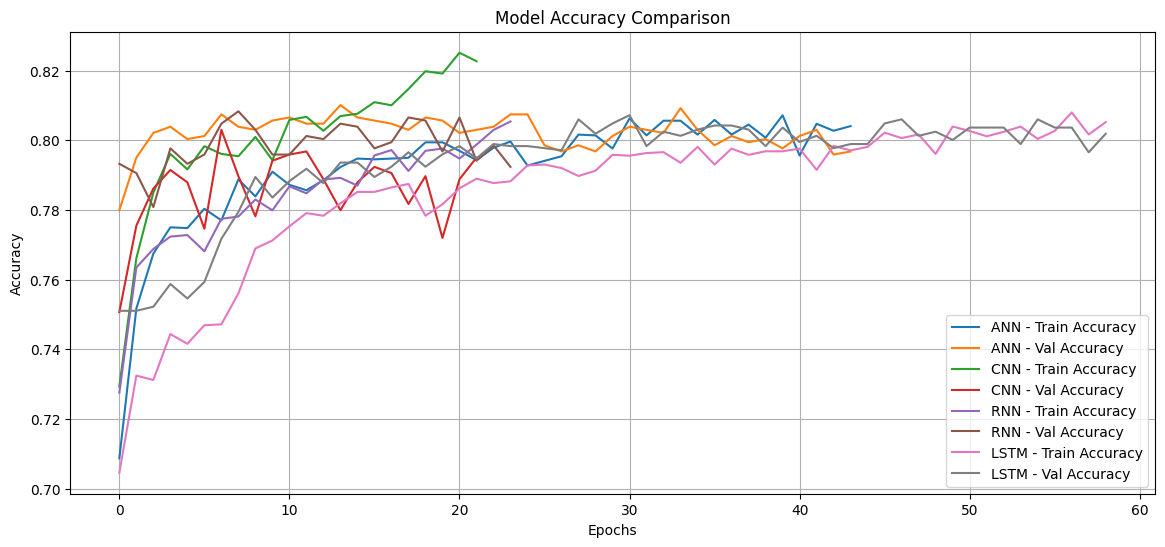

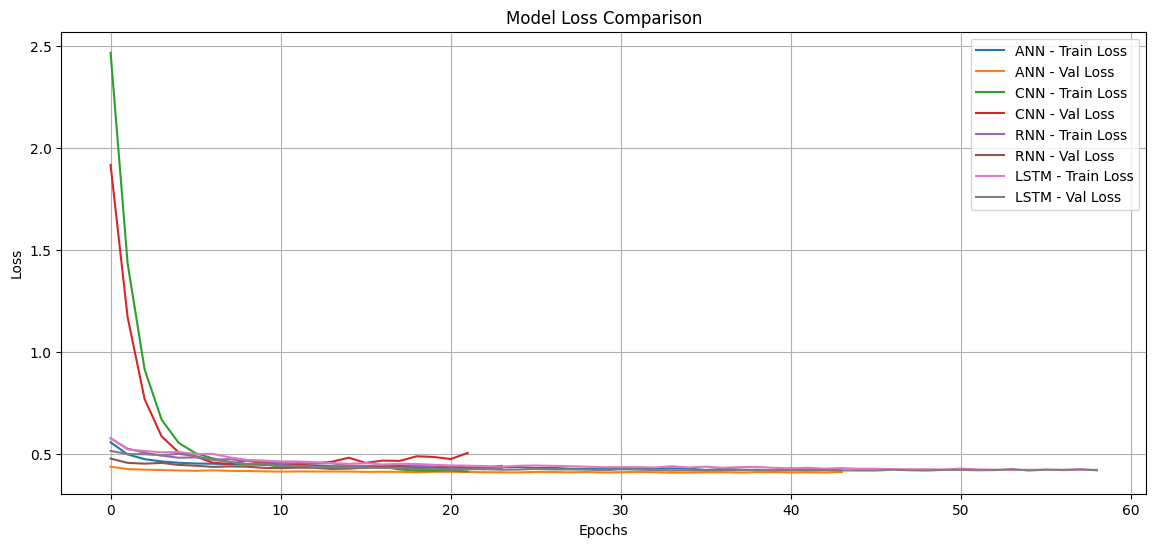

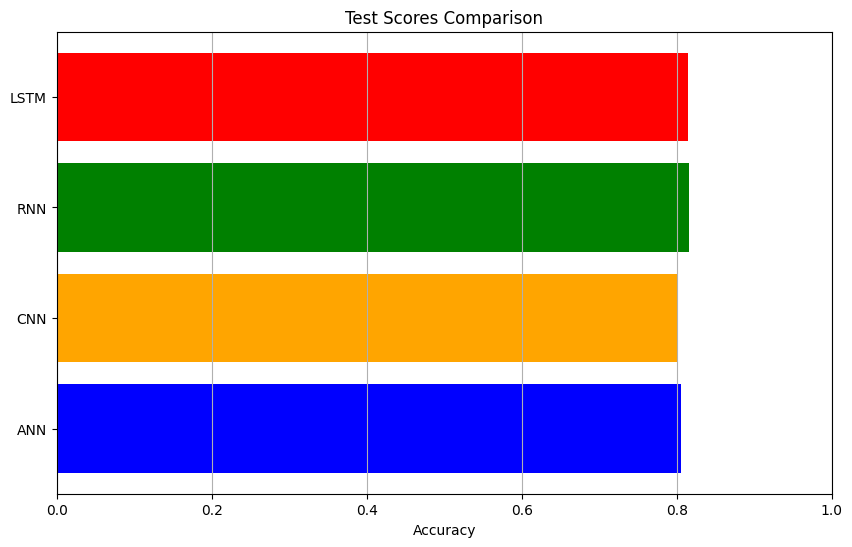

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot accuracy
def plot_accuracy(histories, model_names):
    plt.figure(figsize=(14, 6))
    for history, name in zip(histories, model_names):
        plt.plot(history.history['accuracy'], label=f'{name} - Train Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{name} - Val Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot loss
def plot_loss(histories, model_names):
    plt.figure(figsize=(14, 6))
    for history, name in zip(histories, model_names):
        plt.plot(history.history['loss'], label=f'{name} - Train Loss')
        plt.plot(history.history['val_loss'], label=f'{name} - Val Loss')
    plt.title('Model Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Function to display test scores
def plot_test_scores(scores, model_names):
    plt.figure(figsize=(10, 6))
    plt.barh(model_names, scores, color=['blue', 'orange', 'green', 'red'])
    plt.title('Test Scores Comparison')
    plt.xlabel('Accuracy')
    plt.xlim(0, 1)  # Set x-axis limits from 0 to 1 for better visibility
    plt.grid(axis='x')
    plt.show()

# Prepare data for plotting
histories = [ann_history, cnn_history, rnn_history, lstm_history]
model_names = ['ANN', 'CNN', 'RNN', 'LSTM']
scores = [ann_score[1], cnn_score[1], rnn_score[1], lstm_score[1]]  # Extract accuracy from evaluation

# Plot accuracy and loss
plot_accuracy(histories, model_names)
plot_loss(histories, model_names)
plot_test_scores(scores, model_names)
